# Gráficos para Avaliação dos Modelos

# Gráfico de Barra

Um para cada métrica (acurácia, revocação e precisão) representando as médias da tabela anterior com os devidos intervalos de confiança
 - Cada gráfico deverá conter 4+4 barras (com os devidos intervalos de confiança) referentes ao classificador Naive Bayes (da atividade 6) + os de SVM: uma barra para cada dataset (todas, pca, sel 1, sel 2)
 - Não esqueçam de colocar no gráfico e rótulo nas barras e uma legenda no slide explicando a “figura”.

- Cada métrica (acurácia, revocação e precisão) terá um gráfico desses
- Neste exemplo, “cond” (condição) são os datasets 
- Cada cor de barra corresponde a um classificador testado

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from ast import literal_eval
from numpy import nan

sns.set(style="whitegrid")

%matplotlib inline

In [2]:
# leitura do dataset com todos os resultados dos modelos

all_models_results = pd.read_excel('all_models_results.xlsx')

print(all_models_results.shape)

all_models_results = all_models_results.sort_values(['Condicao','Algoritmo','Metrica' ],ascending=False)

all_models_results.head()

(126, 7)


,Algoritmo,Atividade,Condicao,Melhores_Params,Metrica,Valor,Intervalo_Confianca
79,SVC,7,ReliefF Desbalanceado - Normalizado,"('rbf', 1, '0.10010000000000001')",Recall,0.660000,"[0.6599999999999999, 0.5210505155810267, 0.798..."
80,SVC,7,ReliefF Desbalanceado - Normalizado,"('rbf', 1, '0.10010000000000001')",Precision,0.736667,"[0.7366666666666666, 0.5743750030070749, 0.898..."
78,SVC,7,ReliefF Desbalanceado - Normalizado,"('rbf', 1, '0.10010000000000001')",Accuracy,0.961546,"[0.961545827633379, 0.9431314642670838, 0.9799..."
82,Naive Bayes,6,ReliefF Desbalanceado - Normalizado,0.8,Recall,0.696667,"[0.697, 0.575, 0.818]"
83,Naive Bayes,6,ReliefF Desbalanceado - Normalizado,0.8,Precision,0.753810,"[0.754, 0.587, 0.921]"


# Accuracy

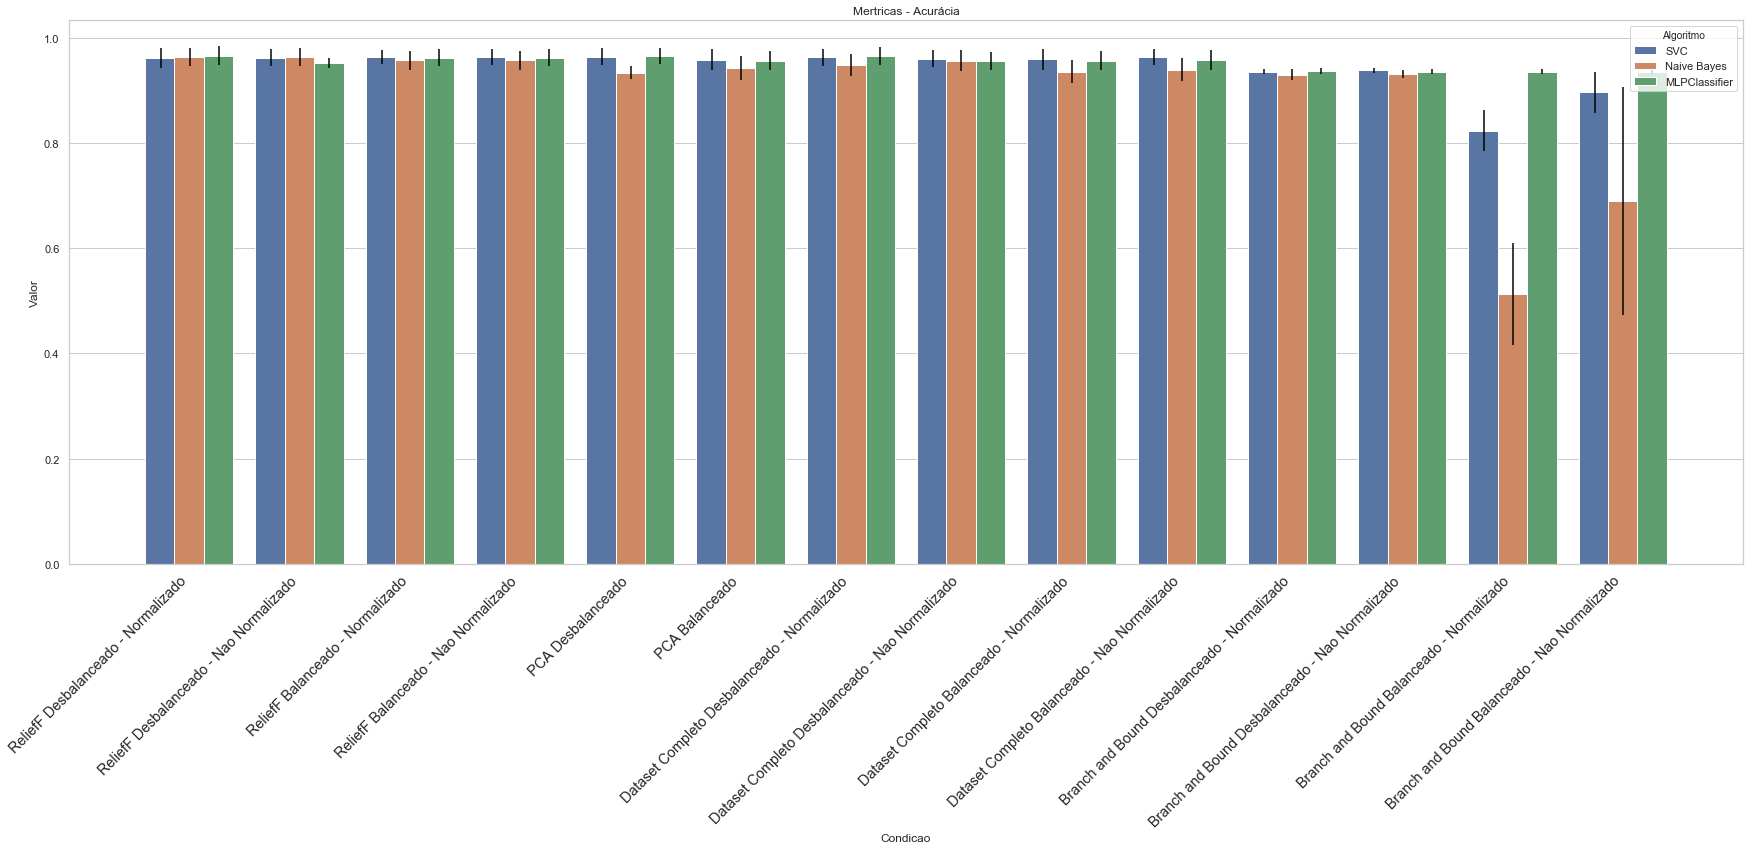

In [3]:
plt.figure(figsize=(30,10))

metrica = 'Accuracy'
df_acc = all_models_results[all_models_results['Metrica'] == metrica]

ax_acc = sns.barplot(x='Condicao', y='Valor',  hue='Algoritmo', data=df_acc)
plt.title('Mertricas - Acurácia')

plt.xticks( rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

#plt.ylim(0, 1.1)

for idx, ci in enumerate(df_acc['Intervalo_Confianca']):
    # transforma em lista
    ci = literal_eval(ci)
    mean = ci[0]
    ci_max = ci[1]
    ci_min = ci[2]
    #plt.errorbar(x=df_acc['Condicao'].index,y=mean,yerr= (ci_max - mean) , fmt='none', color = 'black', barsabove=True)
    if(idx%3 == 0):
        plt.errorbar(x = -.255 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%3 == 1):
        plt.errorbar(x = -.33 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    else:
        plt.errorbar(x = -.4 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)

        
#plt.errorbar(x=[0],y=mean_unbalanced[0],yerr= (acc_max_unbalanced - mean_unbalanced[0]) , fmt='none', color = 'black')
#plt.errorbar(x=[1],y=mean_unbalanced[1],yerr= (rec_max_unbalanced - mean_unbalanced[1]) , fmt='none', color = 'black')
#plt.errorbar(x=[2],y=mean_unbalanced[2],yerr= (pre_max_unbalanced - mean_unbalanced[2]) , fmt='none', color = 'black')


plt.savefig('avaliacao_modelo_accuracy.png',  bbox_inches='tight')

plt.show()

# Recall

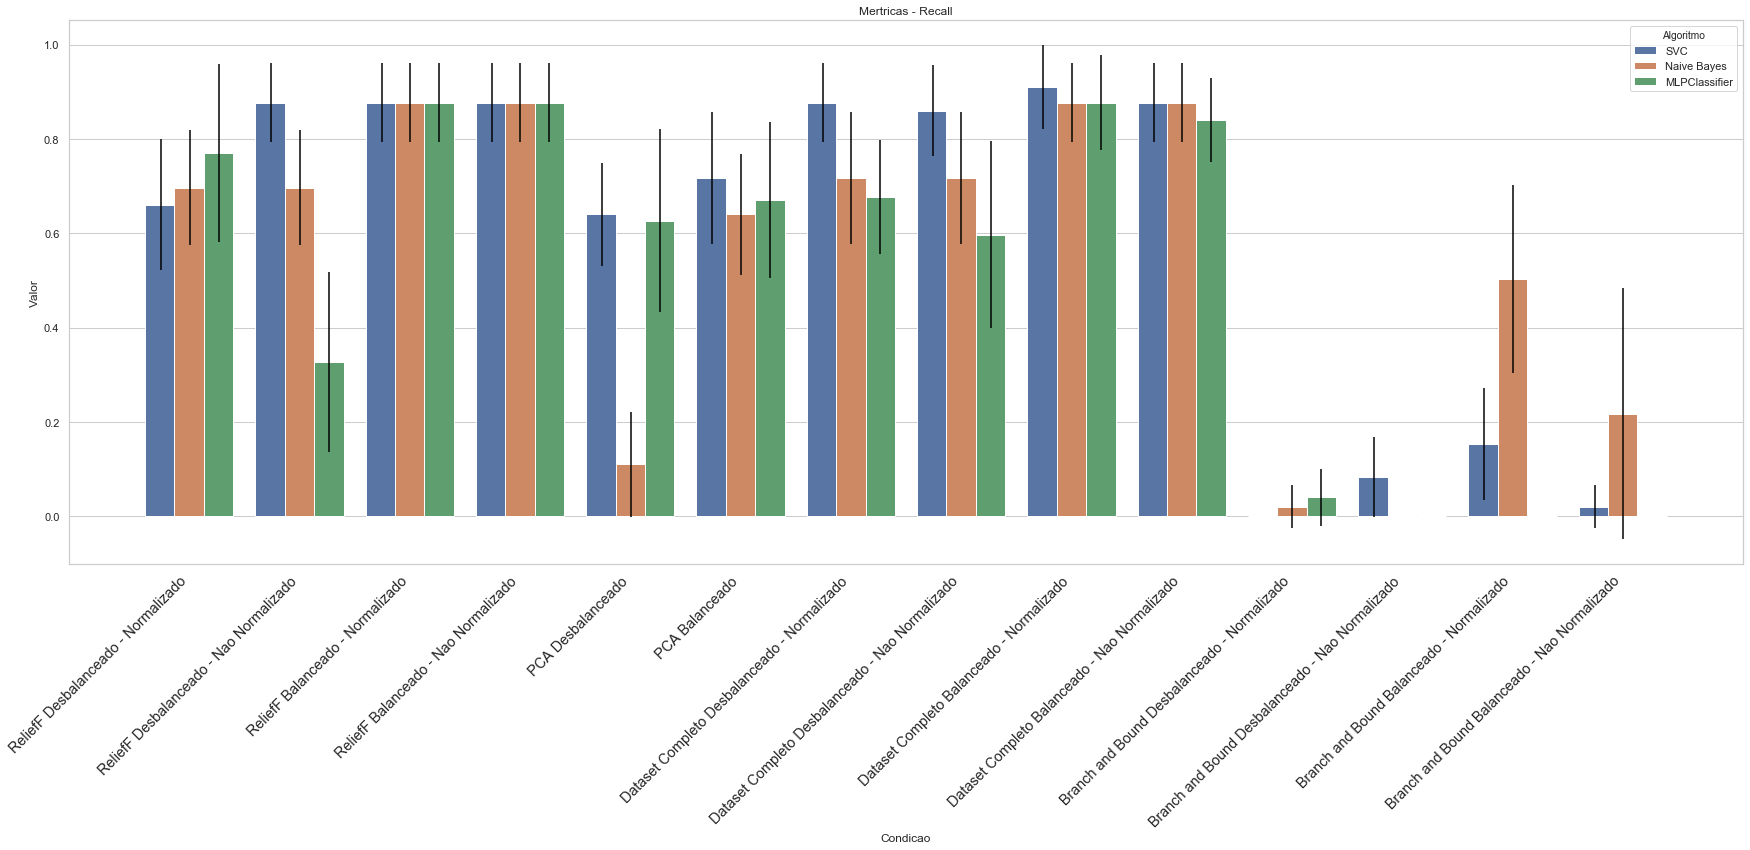

In [4]:
plt.figure(figsize=(30,10))

metrica = 'Recall'
df_rec = all_models_results[all_models_results['Metrica'] == metrica]

ax_rec = sns.barplot(x="Condicao", y="Valor", hue='Algoritmo', data=df_rec)
plt.title('Mertricas - Recall')

plt.xticks( rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

#plt.ylim(0, 1.1)

for idx, ci in enumerate(df_rec['Intervalo_Confianca']):
    ci = ci.replace('nan', '0')
    # transforma em lista
    ci = literal_eval(ci)
    mean = ci[0]
    ci_max = ci[1]
    ci_min = ci[2]
    #plt.errorbar(x=df_acc['Condicao'].index,y=mean,yerr= (ci_max - mean) , fmt='none', color = 'black', barsabove=True)
    if(idx%3 == 0):
        plt.errorbar(x = -.255 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%3 == 1):
        plt.errorbar(x = -.33 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    else:
        plt.errorbar(x = -.4 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
 

plt.savefig('avaliacao_modelo_recall.png',  bbox_inches='tight')

plt.show()

# Precision

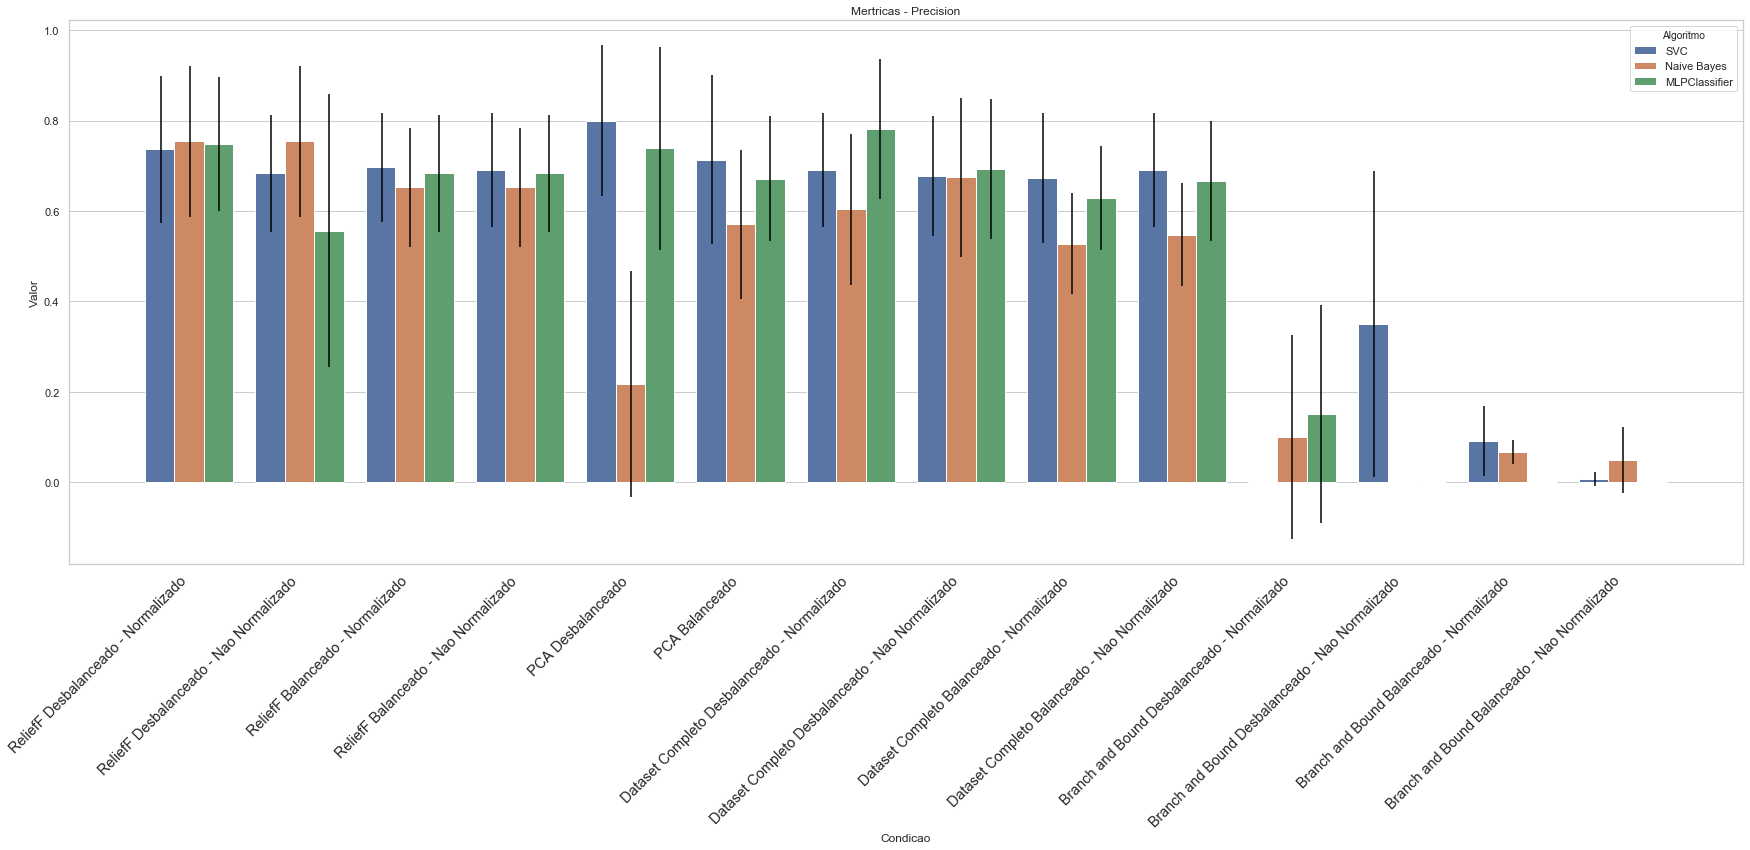

In [5]:
plt.figure(figsize=(30,10))

metrica = 'Precision'
df_pre = all_models_results[all_models_results['Metrica'] == metrica]

ax_acc = sns.barplot(x="Condicao", y="Valor", hue='Algoritmo', data=df_pre)
plt.title('Mertricas - Precision')

plt.xticks( rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

#plt.ylim(0, 1.1)

for idx, ci in enumerate(df_pre['Intervalo_Confianca']):
    ci = ci.replace('nan', '0')
    # transforma em lista
    ci = literal_eval(ci)
    mean = ci[0]
    ci_max = ci[1]
    ci_min = ci[2]
    #plt.errorbar(x=df_acc['Condicao'].index,y=mean,yerr= (ci_max - mean) , fmt='none', color = 'black', barsabove=True)
    if(idx%3 == 0):
        plt.errorbar(x = -.255 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    elif (idx%3 == 1):
        plt.errorbar(x = -.33 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
    else:
        plt.errorbar(x = -.4 +idx/3, y = mean, yerr = (ci_max - mean), fmt = 'none', color = 'black', barsabove = True)
 


plt.savefig('avaliacao_modelo_precision.png',  bbox_inches='tight')

plt.show()